# Task Challenge: Image Retrieval System using Autoencoders


- By Sachin Saj (sachin96saj@gmail.com)

### Importing libraries

In [1]:
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

### Data Loading & Preprocessing

In [2]:
path = '../input/image-retrieval-3/Image Retrieval/dataset'

total_images = []

for images in os.listdir(path):
    path_full = os.path.join(path,images)
    img = cv2.imread(path_full)
    img = cv2.resize(img, (128,128), interpolation = cv2.INTER_NEAREST)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    total_images.append(img)

Total Number of Images in the dataset -> 4728
Shape of an Image (128, 128, 3)


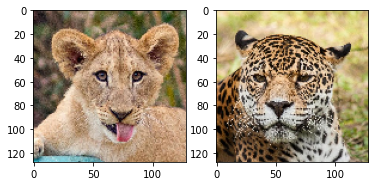

In [3]:
print('Total Number of Images in the dataset ->', len(total_images))
print('Shape of an Image', total_images[0].shape)

plt.subplot(1,2,1)
plt.imshow(total_images[0])
plt.subplot(1,2,2)
plt.imshow(total_images[4000])

### Spliting the data into train & test

In [4]:
x_train, x_test = train_test_split(total_images, test_size=0.25, random_state=42)

In [5]:
x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train.reshape(x_train.shape[0],128,128,3).astype('float32')
x_test = x_test.reshape(x_test.shape[0],128,128,3).astype('float32')

x_train = x_train / 255
x_test = x_test / 255

print(x_train.shape)
print(x_test.shape)

(3546, 128, 128, 3)
(1182, 128, 128, 3)


### Simple Autoencoder Model

In [6]:
input_img = Input(shape=(128,128,3))
x = Conv2D(64,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(32,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(32,(3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same', name='encoder')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
encoder (MaxPooling2D)       (None, 16, 16, 32)       

In [7]:
checkpoint = ModelCheckpoint('/kaggle/working/model.h5',
                             monitor = 'val_loss',
                             mode = 'min',
                             save_best_only=True,
                             verbose = 1
                            )

callbacks = [checkpoint]

In [8]:
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

autoencoder.fit(x_train, x_train, 
                epochs=300, 
                validation_split = 0.1,
                batch_size=8,
                callbacks = callbacks,
               verbose = 1)

Epoch 1/300
399/399 [==============================] - ETA: 0s - loss: 0.0184 - accuracy: 0.7378
Epoch 00001: val_loss improved from inf to 0.01344, saving model to /kaggle/working/model.h5
399/399 [==============================] - 4s 11ms/step - loss: 0.0184 - accuracy: 0.7378 - val_loss: 0.0134 - val_accuracy: 0.8161
Epoch 2/300
395/399 [============================>.] - ETA: 0s - loss: 0.0122 - accuracy: 0.8308
Epoch 00002: val_loss improved from 0.01344 to 0.01198, saving model to /kaggle/working/model.h5
399/399 [==============================] - 4s 11ms/step - loss: 0.0122 - accuracy: 0.8307 - val_loss: 0.0120 - val_accuracy: 0.8469
Epoch 3/300
394/399 [============================>.] - ETA: 0s - loss: 0.0114 - accuracy: 0.8433
Epoch 00003: val_loss improved from 0.01198 to 0.01193, saving model to /kaggle/working/model.h5
399/399 [==============================] - 4s 10ms/step - loss: 0.0114 - accuracy: 0.8434 - val_loss: 0.0119 - val_accuracy: 0.8502
Epoch 4/300
396/399 [=====

Epoch 27/300
394/399 [============================>.] - ETA: 0s - loss: 0.0076 - accuracy: 0.8675
Epoch 00027: val_loss improved from 0.00785 to 0.00782, saving model to /kaggle/working/model.h5
399/399 [==============================] - 4s 10ms/step - loss: 0.0076 - accuracy: 0.8676 - val_loss: 0.0078 - val_accuracy: 0.8763
Epoch 28/300
399/399 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 0.8710
Epoch 00028: val_loss did not improve from 0.00782
399/399 [==============================] - 4s 10ms/step - loss: 0.0075 - accuracy: 0.8710 - val_loss: 0.0082 - val_accuracy: 0.8600
Epoch 29/300
398/399 [============================>.] - ETA: 0s - loss: 0.0075 - accuracy: 0.8673
Epoch 00029: val_loss improved from 0.00782 to 0.00770, saving model to /kaggle/working/model.h5
399/399 [==============================] - 4s 10ms/step - loss: 0.0075 - accuracy: 0.8674 - val_loss: 0.0077 - val_accuracy: 0.8689
Epoch 30/300
395/399 [============================>.] - ETA: 0s -

Epoch 55/300
396/399 [============================>.] - ETA: 0s - loss: 0.0069 - accuracy: 0.8765
Epoch 00055: val_loss did not improve from 0.00705
399/399 [==============================] - 4s 10ms/step - loss: 0.0069 - accuracy: 0.8766 - val_loss: 0.0071 - val_accuracy: 0.8762
Epoch 56/300
395/399 [============================>.] - ETA: 0s - loss: 0.0069 - accuracy: 0.8706
Epoch 00056: val_loss improved from 0.00705 to 0.00703, saving model to /kaggle/working/model.h5
399/399 [==============================] - 4s 10ms/step - loss: 0.0069 - accuracy: 0.8706 - val_loss: 0.0070 - val_accuracy: 0.8854
Epoch 57/300
397/399 [============================>.] - ETA: 0s - loss: 0.0068 - accuracy: 0.8764
Epoch 00057: val_loss improved from 0.00703 to 0.00701, saving model to /kaggle/working/model.h5
399/399 [==============================] - 4s 10ms/step - loss: 0.0068 - accuracy: 0.8762 - val_loss: 0.0070 - val_accuracy: 0.8833
Epoch 58/300
394/399 [============================>.] - ETA: 0s -

Epoch 83/300
399/399 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.8779
Epoch 00083: val_loss did not improve from 0.00680
399/399 [==============================] - 4s 10ms/step - loss: 0.0066 - accuracy: 0.8779 - val_loss: 0.0069 - val_accuracy: 0.8827
Epoch 84/300
396/399 [============================>.] - ETA: 0s - loss: 0.0066 - accuracy: 0.8779
Epoch 00084: val_loss did not improve from 0.00680
399/399 [==============================] - 4s 10ms/step - loss: 0.0066 - accuracy: 0.8780 - val_loss: 0.0070 - val_accuracy: 0.8743
Epoch 85/300
399/399 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.8773
Epoch 00085: val_loss did not improve from 0.00680
399/399 [==============================] - 4s 10ms/step - loss: 0.0066 - accuracy: 0.8773 - val_loss: 0.0068 - val_accuracy: 0.8847
Epoch 86/300
396/399 [============================>.] - ETA: 0s - loss: 0.0066 - accuracy: 0.8792
Epoch 00086: val_loss did not improve from 0.00680
399/399 

Epoch 111/300
394/399 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.8807
Epoch 00111: val_loss did not improve from 0.00663
399/399 [==============================] - 4s 10ms/step - loss: 0.0065 - accuracy: 0.8805 - val_loss: 0.0067 - val_accuracy: 0.8624
Epoch 112/300
395/399 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.8798
Epoch 00112: val_loss did not improve from 0.00663
399/399 [==============================] - 4s 10ms/step - loss: 0.0065 - accuracy: 0.8798 - val_loss: 0.0067 - val_accuracy: 0.8854
Epoch 113/300
397/399 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.8807
Epoch 00113: val_loss improved from 0.00663 to 0.00662, saving model to /kaggle/working/model.h5
399/399 [==============================] - 4s 10ms/step - loss: 0.0065 - accuracy: 0.8808 - val_loss: 0.0066 - val_accuracy: 0.8882
Epoch 114/300
397/399 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.8790
Epoch 001

398/399 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.8801
Epoch 00139: val_loss improved from 0.00658 to 0.00656, saving model to /kaggle/working/model.h5
399/399 [==============================] - 4s 11ms/step - loss: 0.0064 - accuracy: 0.8801 - val_loss: 0.0066 - val_accuracy: 0.8884
Epoch 140/300
396/399 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.8801
Epoch 00140: val_loss did not improve from 0.00656
399/399 [==============================] - 4s 10ms/step - loss: 0.0064 - accuracy: 0.8800 - val_loss: 0.0068 - val_accuracy: 0.8787
Epoch 141/300
397/399 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.8804
Epoch 00141: val_loss did not improve from 0.00656
399/399 [==============================] - 4s 10ms/step - loss: 0.0064 - accuracy: 0.8804 - val_loss: 0.0066 - val_accuracy: 0.8854
Epoch 142/300
394/399 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.8825
Epoch 00142: val_loss d

Epoch 167/300
397/399 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.8819
Epoch 00167: val_loss did not improve from 0.00649
399/399 [==============================] - 4s 10ms/step - loss: 0.0063 - accuracy: 0.8821 - val_loss: 0.0065 - val_accuracy: 0.8787
Epoch 168/300
399/399 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 0.8821
Epoch 00168: val_loss did not improve from 0.00649
399/399 [==============================] - 4s 10ms/step - loss: 0.0063 - accuracy: 0.8821 - val_loss: 0.0065 - val_accuracy: 0.8883
Epoch 169/300
395/399 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.8813
Epoch 00169: val_loss did not improve from 0.00649
399/399 [==============================] - 4s 11ms/step - loss: 0.0063 - accuracy: 0.8814 - val_loss: 0.0065 - val_accuracy: 0.8849
Epoch 170/300
395/399 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.8825
Epoch 00170: val_loss improved from 0.00649 to 0.00647,

397/399 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.8816
Epoch 00195: val_loss did not improve from 0.00642
399/399 [==============================] - 4s 10ms/step - loss: 0.0063 - accuracy: 0.8815 - val_loss: 0.0065 - val_accuracy: 0.8814
Epoch 196/300
399/399 [==============================] - ETA: 0s - loss: 0.0062 - accuracy: 0.8819
Epoch 00196: val_loss did not improve from 0.00642
399/399 [==============================] - 4s 11ms/step - loss: 0.0062 - accuracy: 0.8819 - val_loss: 0.0065 - val_accuracy: 0.8893
Epoch 197/300
395/399 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.8802
Epoch 00197: val_loss did not improve from 0.00642
399/399 [==============================] - 4s 11ms/step - loss: 0.0063 - accuracy: 0.8805 - val_loss: 0.0064 - val_accuracy: 0.8882
Epoch 198/300
396/399 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.8820
Epoch 00198: val_loss did not improve from 0.00642
399/399 [=========

Epoch 223/300
397/399 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.8825
Epoch 00223: val_loss did not improve from 0.00635
399/399 [==============================] - 4s 10ms/step - loss: 0.0062 - accuracy: 0.8824 - val_loss: 0.0066 - val_accuracy: 0.8864
Epoch 224/300
397/399 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.8807
Epoch 00224: val_loss did not improve from 0.00635
399/399 [==============================] - 4s 10ms/step - loss: 0.0062 - accuracy: 0.8807 - val_loss: 0.0065 - val_accuracy: 0.8530
Epoch 225/300
397/399 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.8817
Epoch 00225: val_loss did not improve from 0.00635
399/399 [==============================] - 4s 10ms/step - loss: 0.0062 - accuracy: 0.8818 - val_loss: 0.0068 - val_accuracy: 0.8525
Epoch 226/300
399/399 [==============================] - ETA: 0s - loss: 0.0062 - accuracy: 0.8802
Epoch 00226: val_loss did not improve from 0.00635
399/

Epoch 252/300
394/399 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.8833
Epoch 00252: val_loss improved from 0.00630 to 0.00629, saving model to /kaggle/working/model.h5
399/399 [==============================] - 4s 10ms/step - loss: 0.0061 - accuracy: 0.8834 - val_loss: 0.0063 - val_accuracy: 0.8840
Epoch 253/300
395/399 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.8828
Epoch 00253: val_loss did not improve from 0.00629
399/399 [==============================] - 4s 10ms/step - loss: 0.0061 - accuracy: 0.8829 - val_loss: 0.0063 - val_accuracy: 0.8820
Epoch 254/300
396/399 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.8792
Epoch 00254: val_loss improved from 0.00629 to 0.00629, saving model to /kaggle/working/model.h5
399/399 [==============================] - 4s 10ms/step - loss: 0.0061 - accuracy: 0.8793 - val_loss: 0.0063 - val_accuracy: 0.8849
Epoch 255/300
397/399 [============================>.] - ETA: 

Epoch 281/300
397/399 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.8803
Epoch 00281: val_loss did not improve from 0.00625
399/399 [==============================] - 4s 10ms/step - loss: 0.0061 - accuracy: 0.8803 - val_loss: 0.0063 - val_accuracy: 0.8855
Epoch 282/300
396/399 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.8839
Epoch 00282: val_loss did not improve from 0.00625
399/399 [==============================] - 4s 10ms/step - loss: 0.0061 - accuracy: 0.8838 - val_loss: 0.0064 - val_accuracy: 0.8827
Epoch 283/300
399/399 [==============================] - ETA: 0s - loss: 0.0061 - accuracy: 0.8804
Epoch 00283: val_loss did not improve from 0.00625
399/399 [==============================] - 4s 10ms/step - loss: 0.0061 - accuracy: 0.8804 - val_loss: 0.0063 - val_accuracy: 0.8855
Epoch 284/300
397/399 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.8811
Epoch 00284: val_loss did not improve from 0.00625
399/

### Considering the encoder part

- The encoder part represents the first part of the architecture.
- Now, we have made the enocder to learn the way to encode our images into latent-space representation.
- The latent representation is what we are interested. The model (encoder) has learned, how to compress the visual content of an image, thus it means that all the similar images will be encoded in a similar way (this point will help us to retrieve similar images from our dataset)
- Encoder dimension in this case is 16x16x8

In [9]:
encoder = Model(inputs=autoencoder.input, outputs = autoencoder.get_layer('encoder').output)

### Testing

In [10]:
path_test = '../input/image-retrieval-3/Image Retrieval/Test_Images/'

test_images = []

for images in os.listdir(path_test):
    path_full = os.path.join(path_test, images)
    img = cv2.imread(path_full)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_images.append(img)

In [45]:
print('Enter a random number from (0-9)')
x = int(input())

Enter a random number from (0-9)
8


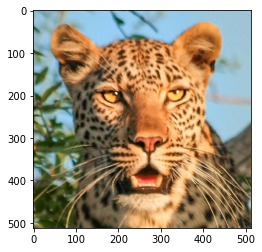

In [46]:
plt.imshow(test_images[x])

In [47]:
# First step: Preprocessing

# 1. Resizing the test image and reshape

test_images[x] = cv2.resize(test_images[x], (128,128), interpolation = cv2.INTER_NEAREST)
test_images[x] = test_images[x].reshape(1,128,128,3)

# 2. Encode the image to be searched and test set
# (We have to encode (Encoder Network) both the image to be searched and the dataset, where the image is been searched)
# (Then their similarity in latent representation will be considered for finding the similar images in the dataset)
# (The Algorithm to be used is KNN)

testset_encode = encoder.predict(x_test)
test_encode = encoder.predict(test_images[x])

print(testset_encode.shape) # the encoder dimension (16x16x8)
print(test_encode.shape)

(1182, 16, 16, 32)
(1, 16, 16, 32)


In [48]:
print('Number of images to be printed from the dataset, which is similar to the input image')
y = int(input())

Number of images to be printed from the dataset, which is similar to the input image
5


In [49]:
testset_encode = testset_encode.reshape(-1,16*16*32)
test_encode = test_encode.reshape(-1,16*16*32)

print(testset_encode.shape)
print(test_encode.shape)

KNN = NearestNeighbors(n_neighbors= y).fit(testset_encode) # training on encoded dataset
dist, ind = KNN.kneighbors(np.array(test_encode))
simil_img = x_test[ind]
simil_img = simil_img.reshape(-1,128,128,3)
print(simil_img.shape)

(1182, 8192)
(1, 8192)
(5, 128, 128, 3)


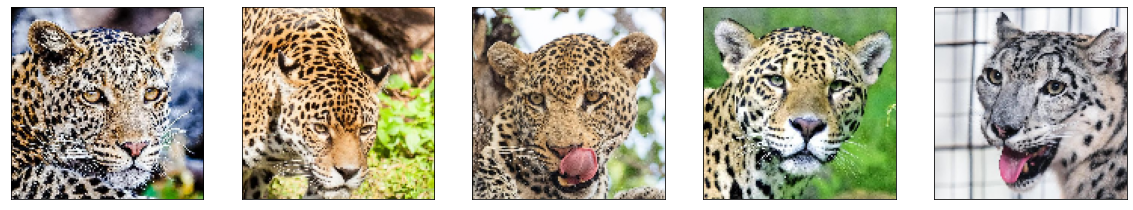

In [50]:
plt.figure(figsize=(20, 6))
for i in range(y):
    ax = plt.subplot(1, y, i+1)
    plt.imshow(simil_img[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()